IMPORTING REQUIRED RESPOSITORIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
pwd


'/content'

In [4]:
import os
import glob
import re

# Define the root directory where the subfolders are located
root_dir = '/content/drive/MyDrive/sitrep data uec'

# Find all Excel files within subfolders
excel_files = glob.glob(os.path.join(root_dir, '**', '*.xlsx'), recursive=True)

print("Found Excel files:", excel_files)


Found Excel files: ['/content/drive/MyDrive/sitrep data uec/2020 to 2023/202003-March-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202004-April-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202005-May-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202006-June-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202007-July-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202008-August-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202009-September-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202010-October-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202011-November-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202012-December-sitrep-data-FINAL.xlsx', '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202101-J

In [5]:
# Columns to keep in all datasets
columns_to_keep = ['Region', 'Trust Name',  'G&A beds available', 'G&A beds occupied']

# Number of rows to remove from the start of each month
skip_rows = {
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202003-March-sitrep-data-FINAL.xlsx': 22,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202004-April-sitrep-data-FINAL.xlsx': 22,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202005-May-sitrep-data-FINAL.xlsx': 23,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202006-June-sitrep-data-FINAL.xlsx': 23,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202007-July-sitrep-data-FINAL.xlsx': 24,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202008-August-sitrep-data-FINAL.xlsx': 24,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202009-September-sitrep-data-FINAL.xlsx': 24,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202010-October-sitrep-data-FINAL.xlsx': 24,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202011-November-sitrep-data-FINAL.xlsx': 24,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202012-December-sitrep-data-FINAL.xlsx': 26,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202101-January-sitrep-data-FINAL.xlsx': 26,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202102-February-sitrep-data-FINAL.xlsx': 26,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202103-March-sitrep-data-FINAL.xlsx': 26,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202104-April-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202105-May-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202106-June-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202107-July-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202108-August-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202109-September-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202110-October-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202111-November-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202112-December-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202201-January-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202202-February-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202203-March-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202204-April-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202205-May-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202206-June-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202207-July-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202208-August-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202209-September-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202211-November-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202212-December-2022-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202301-January-2023-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202302-February-2023-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202303-March-2023-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202305-May-2023-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202306-June-2023-sitrep-data-FINAL.xlsx':25,
    '/content/drive/MyDrive/sitrep data uec/2020 to 2023/202307-July-2023-sitrep-data-FINAL.xlsx':25

}

# List to hold each DataFrame
df_list = []
for file_name, rows_to_skip in skip_rows.items():
    try:
        # Extract year and month from the filename
        match = re.search(r'(\d{4})(\d{2})', file_name)
        if match:
            year, month = match.groups()
            date_string = f"{year}-{month}-01"  # Set the day to the first of the month

        # Read the file, skipping the specified rows and selecting only the specified columns
        temp_df = pd.read_excel(file_name, skiprows=rows_to_skip, usecols=columns_to_keep)

        # Add the date column
        temp_df['date'] = pd.to_datetime(date_string)

        # Append the DataFrame to the list
        df_list.append(temp_df)
    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

# Combine all DataFrames if any have been successfully added to the list
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print("DataFrames combined successfully.")
    # Optionally display or export your DataFrame
    print(combined_df.head())
else:
    print("No DataFrames to combine, all files failed to load.")

DataFrames combined successfully.
            Region                                         Trust Name  \
0  East of England        Bedfordshire Hospitals NHS Foundation Trust   
1              NaN  Cambridge University Hospitals NHS Foundation ...   
2              NaN             East and North Hertfordshire NHS Trust   
3              NaN  East Suffolk and North Essex NHS Foundation Trust   
4              NaN  James Paget University Hospitals NHS Foundatio...   

   G&A beds available  G&A beds occupied       date  
0         1003.032258         864.322581 2020-03-01  
1          891.000000         704.516129 2020-03-01  
2          558.161290         494.032258 2020-03-01  
3         1181.225806        1008.870968 2020-03-01  
4          402.548387         353.064516 2020-03-01  


In [6]:
combined_df.shape

(4882, 5)

In [7]:
combined_df.head()

,Region,Trust Name,G&A beds available,G&A beds occupied,date
0,East of England,Bedfordshire Hospitals NHS Foundation Trust,1003.032258,864.322581,2020-03-01
1,NaN,Cambridge University Hospitals NHS Foundation ...,891.000000,704.516129,2020-03-01
2,NaN,East and North Hertfordshire NHS Trust,558.161290,494.032258,2020-03-01
3,NaN,East Suffolk and North Essex NHS Foundation Trust,1181.225806,1008.870968,2020-03-01
4,NaN,James Paget University Hospitals NHS Foundatio...,402.548387,353.064516,2020-03-01


In [8]:
combined_df.index=combined_df.date
combined_df = combined_df.drop('date', axis=1)

In [9]:
combined_df

,Region,Trust Name,G&A beds available,G&A beds occupied
date,,,,
2020-03-01,East of England,Bedfordshire Hospitals NHS Foundation Trust,1003.032258,864.322581
2020-03-01,NaN,Cambridge University Hospitals NHS Foundation ...,891.000000,704.516129
2020-03-01,NaN,East and North Hertfordshire NHS Trust,558.161290,494.032258
2020-03-01,NaN,East Suffolk and North Essex NHS Foundation Trust,1181.225806,1008.870968
2020-03-01,NaN,James Paget University Hospitals NHS Foundatio...,402.548387,353.064516
...,...,...,...,...
2023-07-01,South West,Torbay and South Devon NHS Foundation Trust,368.000000,344.000000
2023-07-01,South West,University Hospitals Bristol and Weston NHS Fo...,974.000000,891.000000
2023-07-01,South West,University Hospitals Dorset NHS Foundation Trust,1058.000000,999.000000


In [10]:
combined_df.isnull().sum()

Region                605
Trust Name              0
G&A beds available      0
G&A beds occupied       0
dtype: int64

In [11]:
combined_df['G&A beds occupied'].count()

4882

In [12]:
#converting the whole columns into int type
combined_df['G&A beds available']=combined_df['G&A beds available'].astype(int)
combined_df['G&A beds occupied']=combined_df['G&A beds occupied'].astype(int)

In [13]:
combined_df.head(641)

,Region,Trust Name,G&A beds available,G&A beds occupied
date,,,,
2020-03-01,East of England,Bedfordshire Hospitals NHS Foundation Trust,1003,864
2020-03-01,NaN,Cambridge University Hospitals NHS Foundation ...,891,704
2020-03-01,NaN,East and North Hertfordshire NHS Trust,558,494
2020-03-01,NaN,East Suffolk and North Essex NHS Foundation Trust,1181,1008
2020-03-01,NaN,James Paget University Hospitals NHS Foundatio...,402,353
...,...,...,...,...
2020-07-01,NaN,Torbay and South Devon NHS Foundation Trust,356,268
2020-07-01,NaN,University Hospitals Bristol and Weston NHS Fo...,964,759
2020-07-01,NaN,University Hospitals Plymouth NHS Trust,791,674


In [14]:
value_counts = combined_df['Region'].value_counts()
print(value_counts)

Region
North East and Yorkshire    753
Midlands                    719
North West                  660
London                      617
South East                  587
South West                  494
East of England             447
Name: count, dtype: int64


In [15]:
combined_df.fillna(method='ffill', inplace=True, limit=639)

In [16]:
combined_df.head(639)

,Region,Trust Name,G&A beds available,G&A beds occupied
date,,,,
2020-03-01,East of England,Bedfordshire Hospitals NHS Foundation Trust,1003,864
2020-03-01,East of England,Cambridge University Hospitals NHS Foundation ...,891,704
2020-03-01,East of England,East and North Hertfordshire NHS Trust,558,494
2020-03-01,East of England,East Suffolk and North Essex NHS Foundation Trust,1181,1008
2020-03-01,East of England,James Paget University Hospitals NHS Foundatio...,402,353
...,...,...,...,...
2020-07-01,South West,Somerset NHS Foundation Trust,569,409
2020-07-01,South West,The Royal Bournemouth and Christchurch Hospita...,478,387
2020-07-01,South West,Torbay and South Devon NHS Foundation Trust,356,268


In [17]:
print(combined_df.describe())

       G&A beds available  G&A beds occupied
count         4882.000000        4882.000000
mean           749.912126         661.495903
std            404.044639         365.089966
min              0.000000           0.000000
25%            459.000000         408.000000
50%            652.500000         577.500000
75%            934.750000         837.000000
max           2517.000000        2394.000000


#EDA

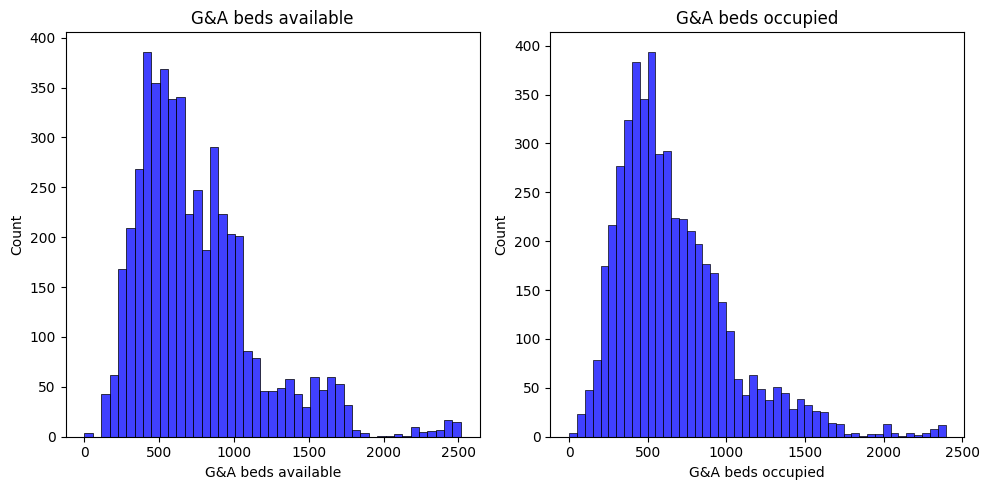

In [17]:
# Histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(combined_df['G&A beds available'], kde=False, color='blue')
plt.title('G&A beds available')
plt.subplot(1, 2, 2)
sns.histplot(combined_df['G&A beds occupied'], kde=False, color='blue')
plt.title('G&A beds occupied')
plt.tight_layout()
plt.show()

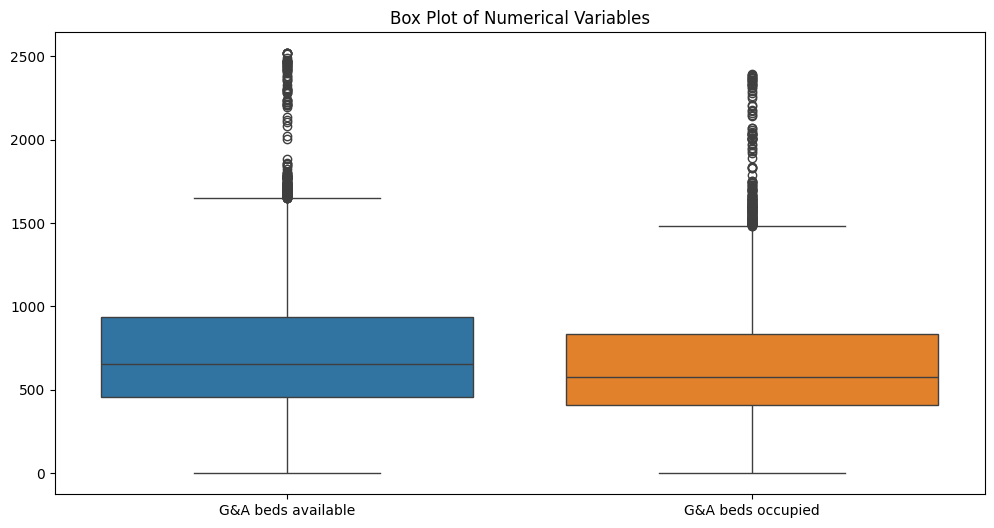

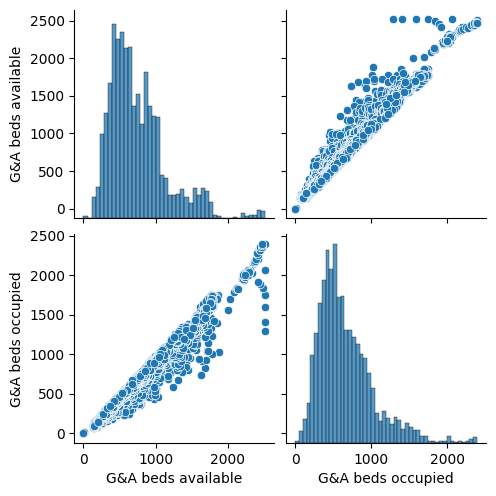

In [21]:
# Boxplot for numerical features to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df[['G&A beds available', 'G&A beds occupied']])
plt.title('Box Plot of Numerical Variables')
plt.show()

# Pair plot for numerical columns
sns.pairplot(combined_df[['G&A beds available', 'G&A beds occupied']])
plt.show()

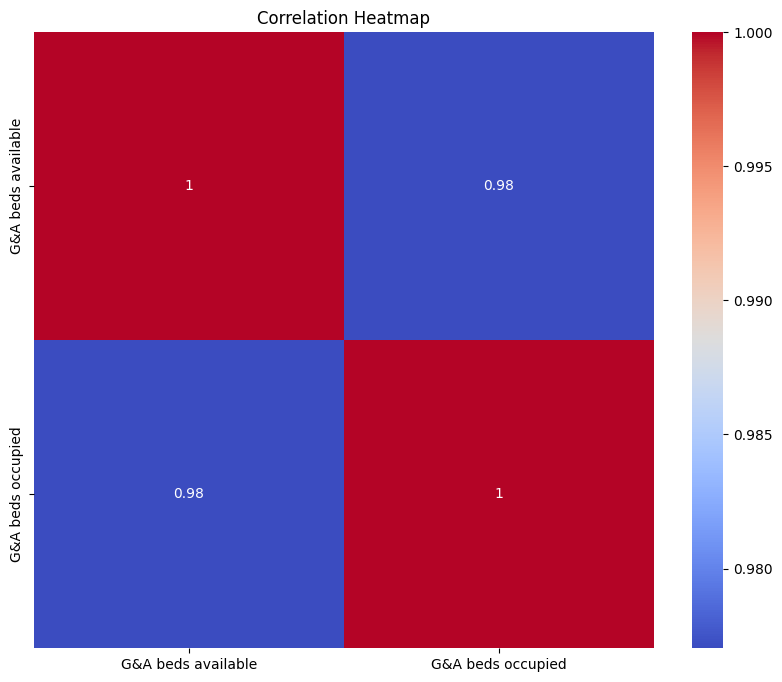

In [22]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[['G&A beds available', 'G&A beds occupied']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

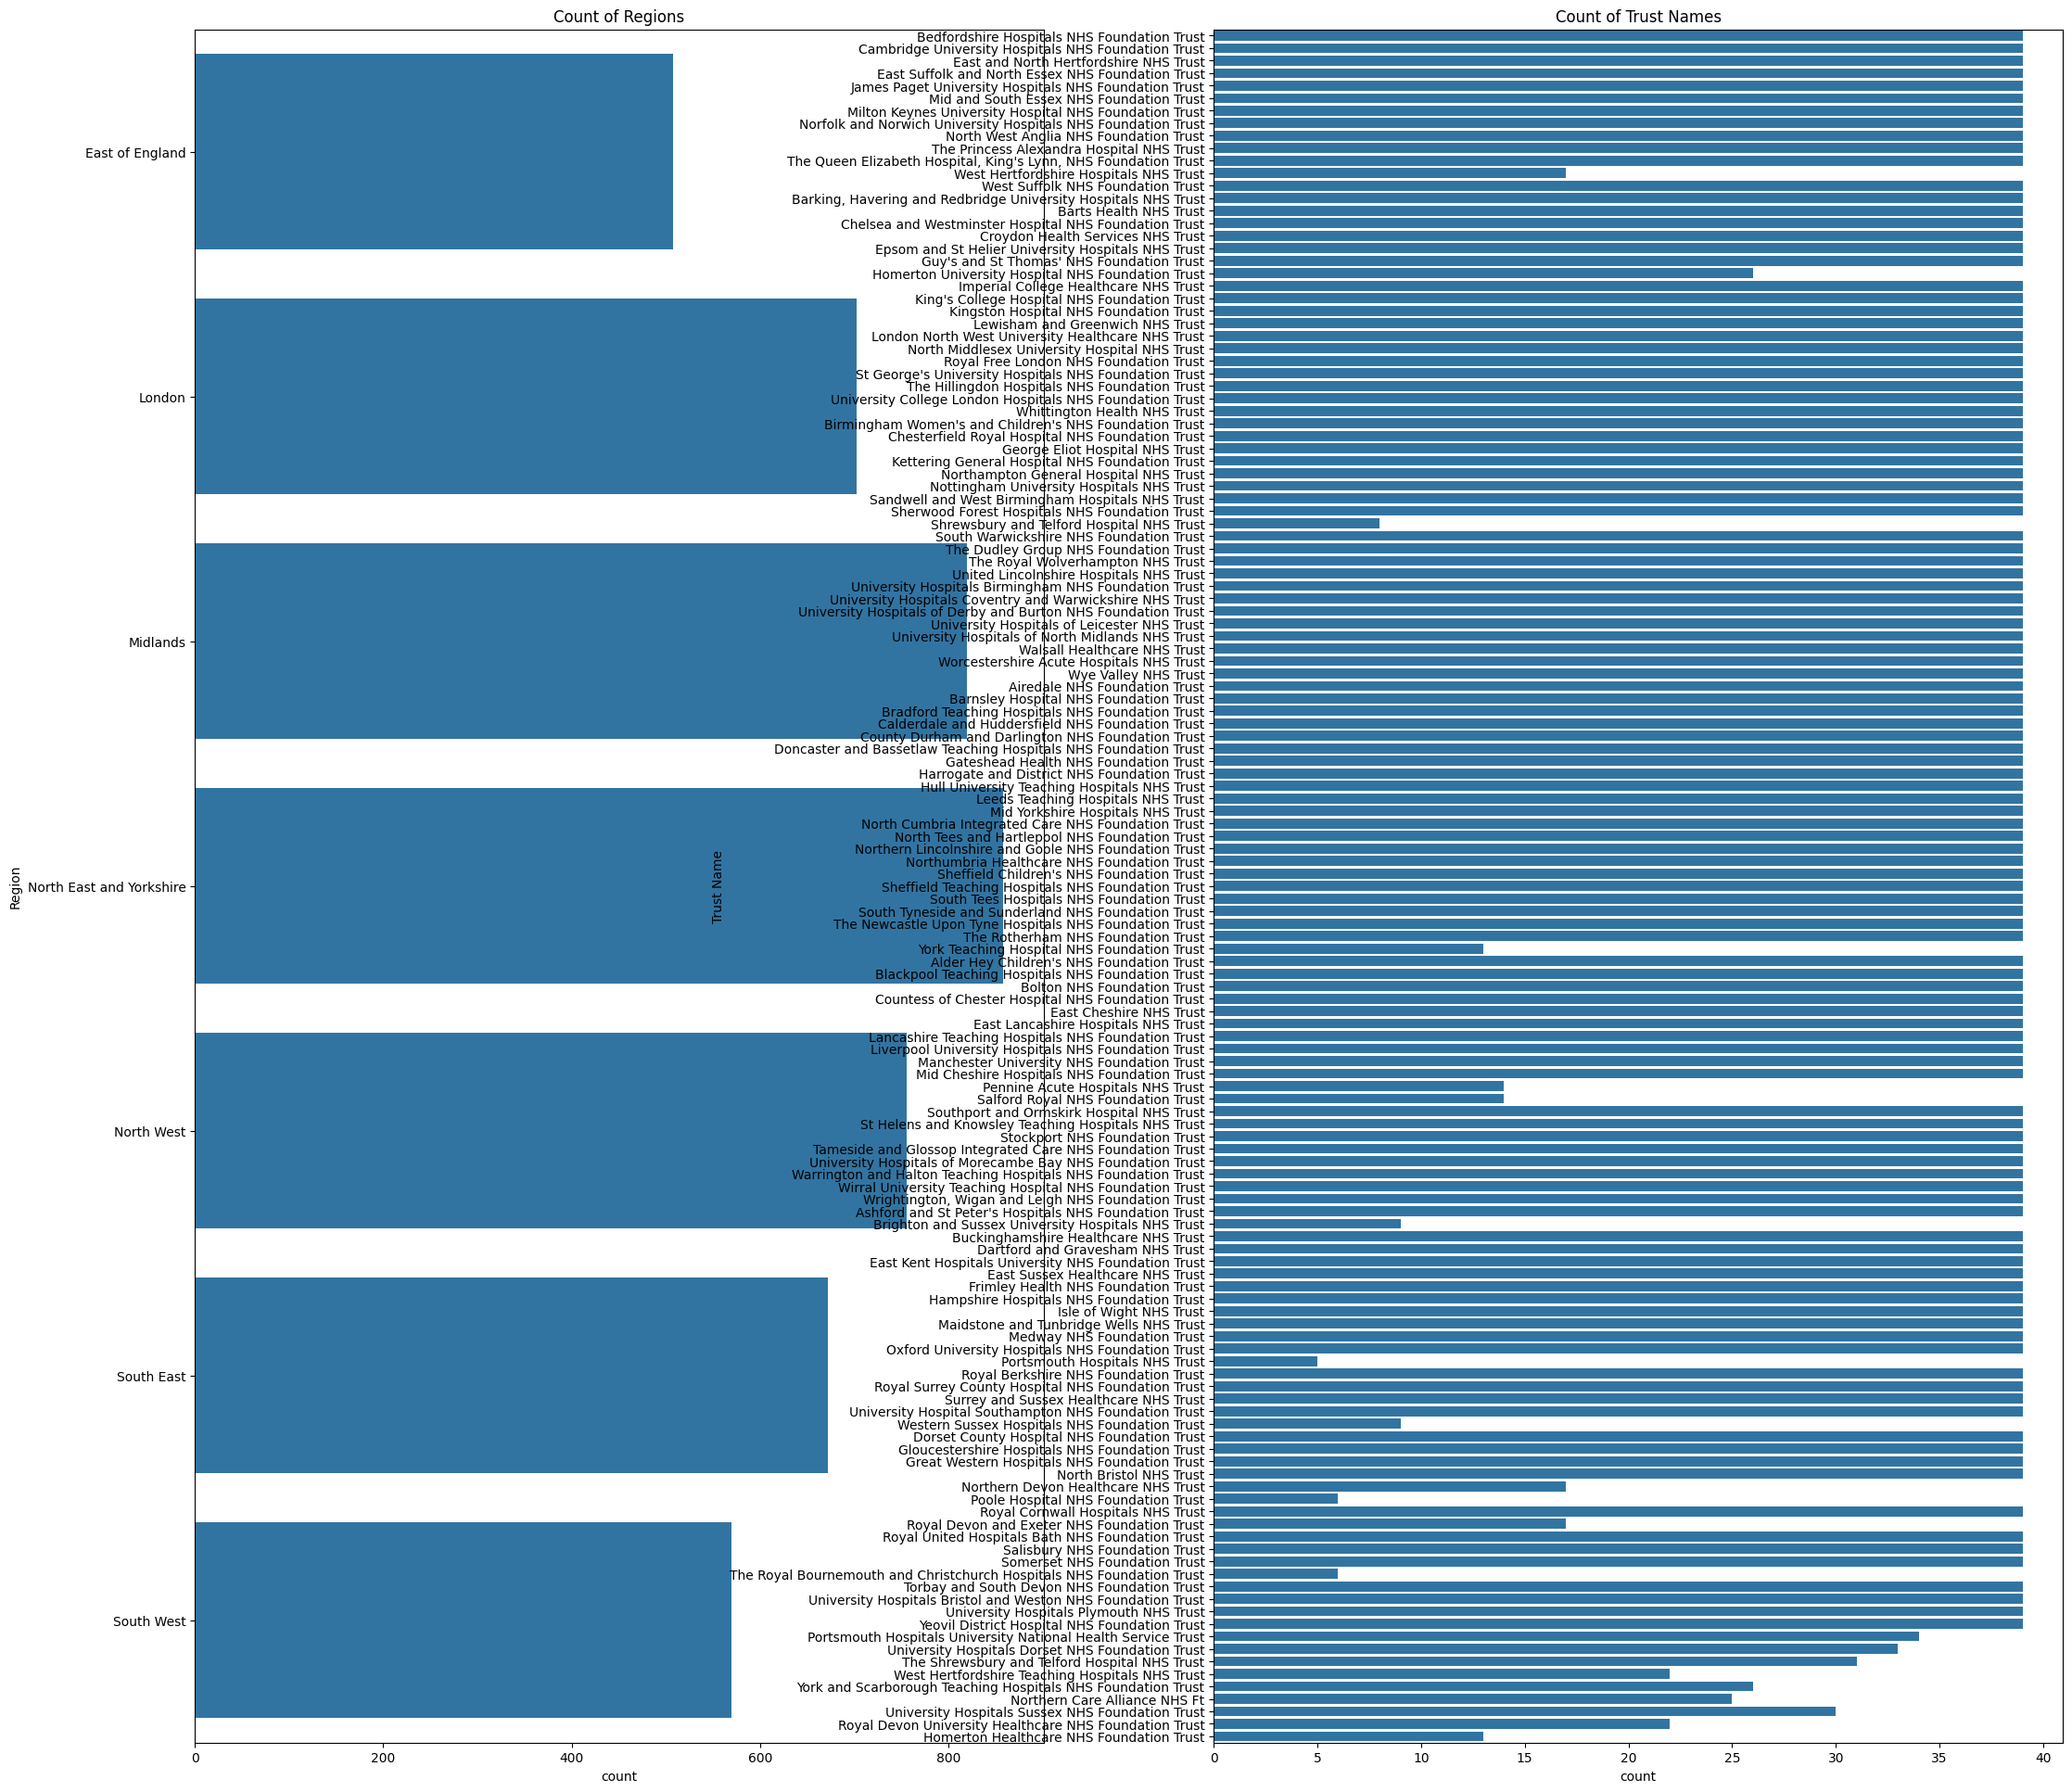

In [26]:
# Assuming 'Region' and 'Trust Name' are categorical, you can visualize their counts
plt.figure(figsize=(26, 24))
plt.subplot(1, 2, 1)
sns.countplot(y=combined_df['Region'])
plt.title('Count of Regions')

plt.subplot(1, 2, 2)
sns.countplot(y=combined_df['Trust Name'])
plt.title('Count of Trust Names')
plt.show()

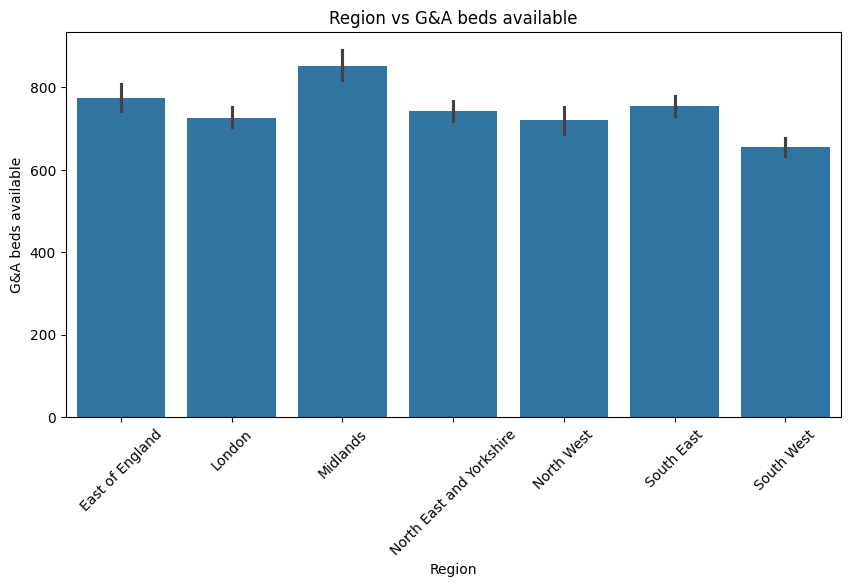

In [27]:
# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='G&A beds available', data=combined_df)
plt.title('Region vs G&A beds available')
plt.xticks(rotation=45)
plt.show()

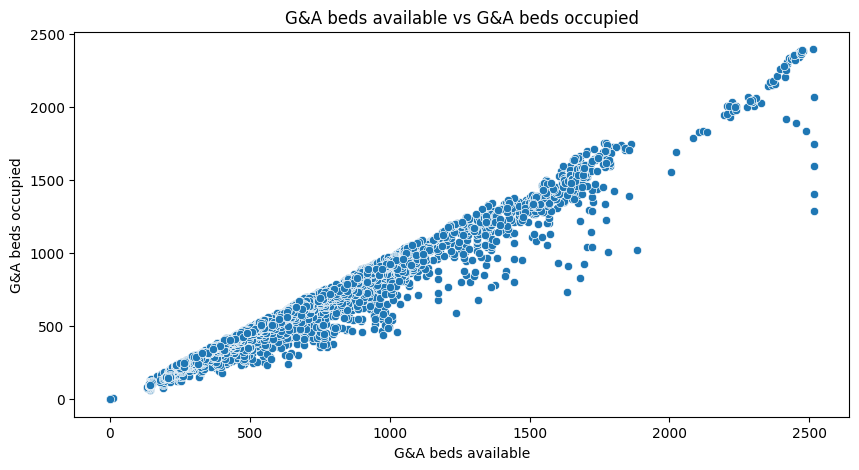

In [28]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='G&A beds available', y='G&A beds occupied', data=combined_df)
plt.title('G&A beds available vs G&A beds occupied')
plt.show()

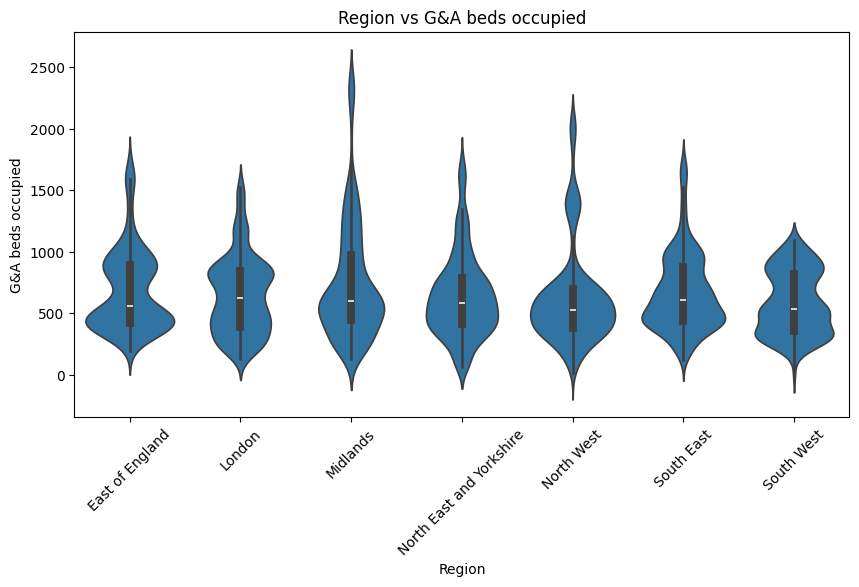

In [29]:
# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='Region', y='G&A beds occupied', data=combined_df)
plt.title('Region vs G&A beds occupied')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Apply one-hot encoding
combined_df = pd.get_dummies(combined_df, columns=['Region'], prefix='Region')

# Check data types
print("Data types in the DataFrame:")
print(combined_df.dtypes)

# Convert boolean columns to integers if mistakenly turned to boolean
for column in combined_df.columns:
    if combined_df[column].dtype == 'bool':
        combined_df[column] = combined_df[column].astype(int)

# Now display the head to confirm changes
print("DataFrame head after ensuring correct data types:")
print(combined_df.head())


Data types in the DataFrame:
Trust Name                         object
G&A beds available                  int64
G&A beds occupied                   int64
Region_East of England               bool
Region_London                        bool
Region_Midlands                      bool
Region_North East and Yorkshire      bool
Region_North West                    bool
Region_South East                    bool
Region_South West                    bool
dtype: object
DataFrame head after ensuring correct data types:
                                                   Trust Name  \
date                                                            
2020-03-01        Bedfordshire Hospitals NHS Foundation Trust   
2020-03-01  Cambridge University Hospitals NHS Foundation ...   
2020-03-01             East and North Hertfordshire NHS Trust   
2020-03-01  East Suffolk and North Essex NHS Foundation Trust   
2020-03-01  James Paget University Hospitals NHS Foundatio...   

            G&A beds available 

In [31]:
combined_df.shape

(4882, 10)

In [32]:
combined_df.head()

,Trust Name,G&A beds available,G&A beds occupied,Region_East of England,Region_London,Region_Midlands,Region_North East and Yorkshire,Region_North West,Region_South East,Region_South West
date,,,,,,,,,,
2020-03-01,Bedfordshire Hospitals NHS Foundation Trust,1003,864,1,0,0,0,0,0,0
2020-03-01,Cambridge University Hospitals NHS Foundation ...,891,704,1,0,0,0,0,0,0
2020-03-01,East and North Hertfordshire NHS Trust,558,494,1,0,0,0,0,0,0
2020-03-01,East Suffolk and North Essex NHS Foundation Trust,1181,1008,1,0,0,0,0,0,0
2020-03-01,James Paget University Hospitals NHS Foundatio...,402,353,1,0,0,0,0,0,0


In [33]:
combined_df = pd.get_dummies(combined_df, columns=['Trust Name'], prefix='Trust Name')

# Check data types
print("Data types in the DataFrame:")
print(combined_df.dtypes)

# Convert boolean columns to integers if mistakenly turned to boolean
for column in combined_df.columns:
    if combined_df[column].dtype == 'bool':
        combined_df[column] = combined_df[column].astype(int)

# Now display the head to confirm changes
print("DataFrame head after ensuring correct data types:")
print(combined_df.head())


Data types in the DataFrame:
G&A beds available                                                         int64
G&A beds occupied                                                          int64
Region_East of England                                                     int64
Region_London                                                              int64
Region_Midlands                                                            int64
                                                                           ...  
Trust Name_Wrightington, Wigan and Leigh NHS Foundation Trust               bool
Trust Name_Wye Valley NHS Trust                                             bool
Trust Name_Yeovil District Hospital NHS Foundation Trust                    bool
Trust Name_York Teaching Hospital NHS Foundation Trust                      bool
Trust Name_York and Scarborough Teaching Hospitals NHS Foundation Trust     bool
Length: 146, dtype: object
DataFrame head after ensuring correct data types:
   

In [34]:
combined_df.shape

(4882, 146)

In [35]:
combined_df.head(150)

,G&A beds available,G&A beds occupied,Region_East of England,Region_London,Region_Midlands,Region_North East and Yorkshire,Region_North West,Region_South East,Region_South West,Trust Name_Airedale NHS Foundation Trust,...,Trust Name_West Suffolk NHS Foundation Trust,Trust Name_Western Sussex Hospitals NHS Foundation Trust,Trust Name_Whittington Health NHS Trust,Trust Name_Wirral University Teaching Hospital NHS Foundation Trust,Trust Name_Worcestershire Acute Hospitals NHS Trust,"Trust Name_Wrightington, Wigan and Leigh NHS Foundation Trust",Trust Name_Wye Valley NHS Trust,Trust Name_Yeovil District Hospital NHS Foundation Trust,Trust Name_York Teaching Hospital NHS Foundation Trust,Trust Name_York and Scarborough Teaching Hospitals NHS Foundation Trust
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,1003,864,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,891,704,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,558,494,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,1181,1008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,402,353,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,618,390,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-04-01,766,431,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-04-01,252,176,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
combined_df.shape

(4882, 146)

RANDOMFOREST REGRESSOR

In [37]:
# Assuming G&A beds occupied is our target column
X = combined_df.drop('G&A beds occupied', axis=1)  # Features
y = combined_df['G&A beds occupied']  # Target variable

records=180

X_train = X[:-records]
y_train = y[:-records]
X_test = X[-records:]
y_test = y[-records:]

In [38]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [39]:
# Calculate RMSE (Root Mean Squared Error) for the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
constant = 1  # Adjust this constant based on the typical scale of data
mape = np.mean(np.abs((y_test - y_pred) / (y_test + constant))) * 100

# Output the performance
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape:.2f}%')


Test RMSE: 45.417087000640265
Test MAE: 26.500570486442232
Test MAPE: 44.86%


In [40]:
y_train

date
2020-03-01     864
2020-03-01     704
2020-03-01     494
2020-03-01    1008
2020-03-01     353
              ... 
2023-06-01     559
2023-06-01     458
2023-06-01     570
2023-06-01     752
2023-06-01     102
Name: G&A beds occupied, Length: 4702, dtype: int64

In [41]:
pd.Series(y_pred)

0      1322.230000
1       833.480000
2       987.310000
3      1256.007500
4       423.726000
          ...     
175     351.741833
176     757.880000
177     978.913667
178     979.214000
179      34.150000
Length: 180, dtype: float64

In [42]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.index = y_test.index.copy()
y_pred_df

,0
date,
2023-06-01,1322.230000
2023-06-01,833.480000
2023-06-01,987.310000
2023-06-01,1256.007500
2023-06-01,423.726000
...,...
2023-07-01,351.741833
2023-07-01,757.880000
2023-07-01,978.913667


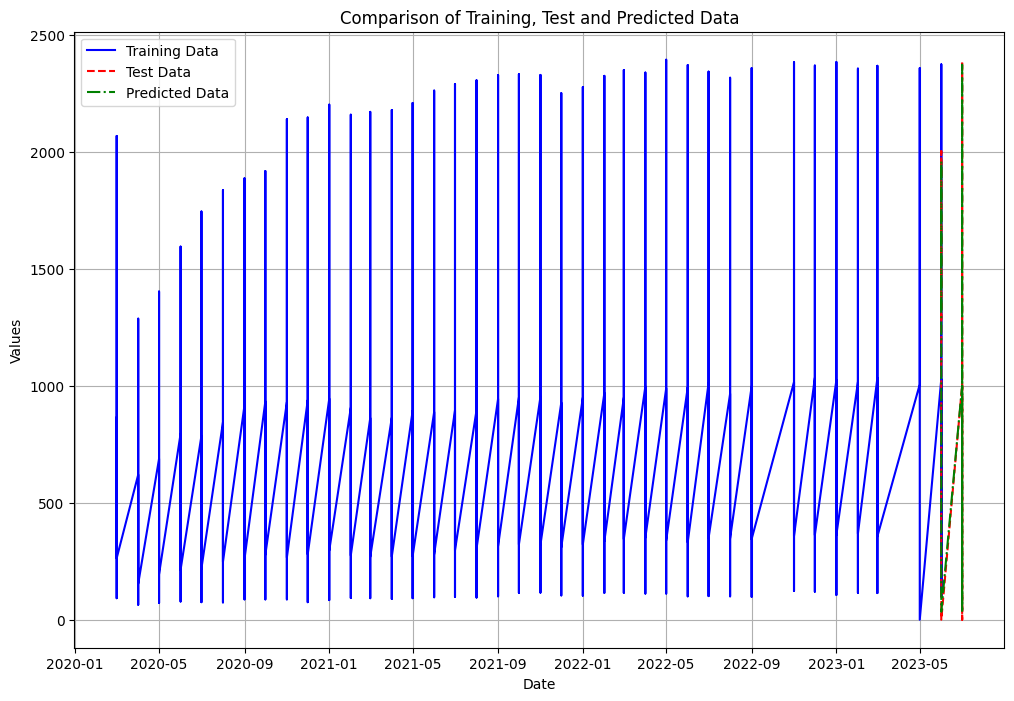

In [43]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot each series with a label and specify line style or marker
plt.plot(y_train.index, y_train, label='Training Data', linestyle='-', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', linestyle='--', color='red')
plt.plot(y_pred_df.index, y_pred_df, label='Predicted Data', linestyle='-.', color='green')

# Add a title and axis labels
plt.title('Comparison of Training, Test and Predicted Data')
plt.xlabel('Date')
plt.ylabel('Values')

# Show legend
plt.legend()

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [44]:
model.predict(X_test.iloc[:1])

array([1322.23])

In [45]:
y_test.iloc[:1]

date
2023-06-01    1283
Name: G&A beds occupied, dtype: int64

HYPERPARAMETER TUNING

In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model on the training set with the best parameters
best_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) for the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
constant = 1  # Adjust this constant based on the typical scale of your data
mape = np.mean(np.abs((y_test - y_pred) / (y_test + constant))) * 100

# Output the performance
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape:.2f}%')
print(f'Best Parameters: {best_params}')


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Test RMSE: 35.912745366184915
Test MAE: 25.23791019476344
Test MAPE: 84.86%
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


XGBOOST REGRESSOR

In [46]:
# Assuming G&A beds occupied is our target column
X = combined_df.drop('G&A beds occupied', axis=1)  # Features
y = combined_df['G&A beds occupied']  # Target variable

records = 180

X_train = X[:-records]
y_train = y[:-records]
X_test = X[-records:]
y_test = y[-records:]

In [47]:
# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [48]:
# Calculate RMSE (Root Mean Squared Error) for the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
constant = 1  # Adjust this constant based on the typical scale of your data
mape = np.mean(np.abs((y_test - y_pred) / (y_test + constant))) * 100

# Output the performance
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape:.2f}%')

Test RMSE: 39.25768715535434
Test MAE: 25.036610073513454
Test MAPE: 57.40%


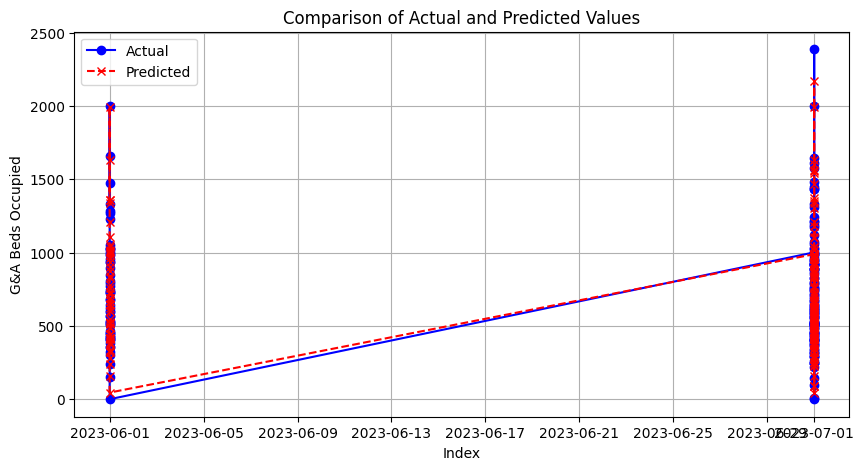

In [49]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('G&A Beds Occupied')
plt.legend()
plt.grid(True)
plt.show()


HYPERPARAMETER TUNING

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the model with the best parameters
best_model = xgb.XGBRegressor(**best_params, random_state=42, objective='reg:squarederror')

# Train the model on the training set with the best parameters
best_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) for the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
constant = 1  # Adjust this constant based on the typical scale of your data
mape = np.mean(np.abs((y_test - y_pred) / (y_test + constant))) * 100

# Output the performance
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')
print(f'Test MAPE: {mape:.2f}%')
print(f'Best Parameters: {best_params}')


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Test RMSE: 40.15557074202353
Test MAE: 27.731979031032985
Test MAPE: 92.47%
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


RECURRENT NEURAL NETWORKS(LSTM)

In [50]:
data = combined_df.values  # Convert DataFrame to numpy array if not already

# Define the number of features
n_features = data.shape[1]

# Splitting the dataset into training and testing sets
train_data = data[:-180]
test_data = data[-180:]


In [51]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [52]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, n_features))
testX = np.reshape(testX, (testX.shape[0], look_back, n_features))

In [54]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(150, input_shape=(look_back, n_features)))
model.add(Dense(n_features))  # Adjusting output layer to predict all features
model.compile(loss='mean_squared_error', optimizer=Adam())
model.fit(trainX, trainY, epochs=30, batch_size=8, verbose=2)

Epoch 1/30
588/588 - 6s - loss: 8354.4678 - 6s/epoch - 10ms/step
Epoch 2/30
588/588 - 4s - loss: 7410.6699 - 4s/epoch - 8ms/step
Epoch 3/30
588/588 - 4s - loss: 6609.2964 - 4s/epoch - 7ms/step
Epoch 4/30
588/588 - 3s - loss: 5891.7529 - 3s/epoch - 6ms/step
Epoch 5/30
588/588 - 3s - loss: 5256.1934 - 3s/epoch - 5ms/step
Epoch 6/30
588/588 - 4s - loss: 4682.0977 - 4s/epoch - 7ms/step
Epoch 7/30
588/588 - 5s - loss: 4182.2437 - 5s/epoch - 8ms/step
Epoch 8/30
588/588 - 3s - loss: 3750.1333 - 3s/epoch - 6ms/step
Epoch 9/30
588/588 - 3s - loss: 3377.5801 - 3s/epoch - 6ms/step
Epoch 10/30
588/588 - 4s - loss: 3061.1204 - 4s/epoch - 6ms/step
Epoch 11/30
588/588 - 5s - loss: 2798.2278 - 5s/epoch - 8ms/step
Epoch 12/30
588/588 - 3s - loss: 2582.7195 - 3s/epoch - 6ms/step
Epoch 13/30
588/588 - 3s - loss: 2410.9900 - 3s/epoch - 5ms/step
Epoch 14/30
588/588 - 4s - loss: 2281.4031 - 4s/epoch - 7ms/step
Epoch 15/30
588/588 - 5s - loss: 2187.4744 - 5s/epoch - 8ms/step
Epoch 16/30
588/588 - 4s - loss: 

In [55]:
# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

6/6 [==============================] - 0s 4ms/step


In [56]:
# Calculate and print root mean squared error
trainScore = np.sqrt(np.mean((trainPredict - trainY)**2))
testScore = np.sqrt(np.mean((testPredict - testY)**2))
print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')

Train Score: 44.91 RMSE
Test Score: 47.75 RMSE


In [57]:
# Define MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate and print MAPE, ensuring to handle zero denominators
def calculate_mape(y_true, y_pred):
    # Mask to avoid division by zero
    mask = y_true != 0
    return mean_absolute_percentage_error(y_true[mask], y_pred[mask])

trainMAPE = calculate_mape(trainY, trainPredict)
testMAPE = calculate_mape(testY, testPredict)

# Print RMSE and MAPE scores
trainScore = np.sqrt(np.mean((trainPredict - trainY)**2))
testScore = np.sqrt(np.mean((testPredict - testY)**2))
print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')
print(f'Train MAPE: {trainMAPE:.2f}%')
print(f'Test MAPE: {testMAPE:.2f}%')

Train Score: 44.91 RMSE
Test Score: 47.75 RMSE
Train MAPE: 73.61%
Test MAPE: 88.10%


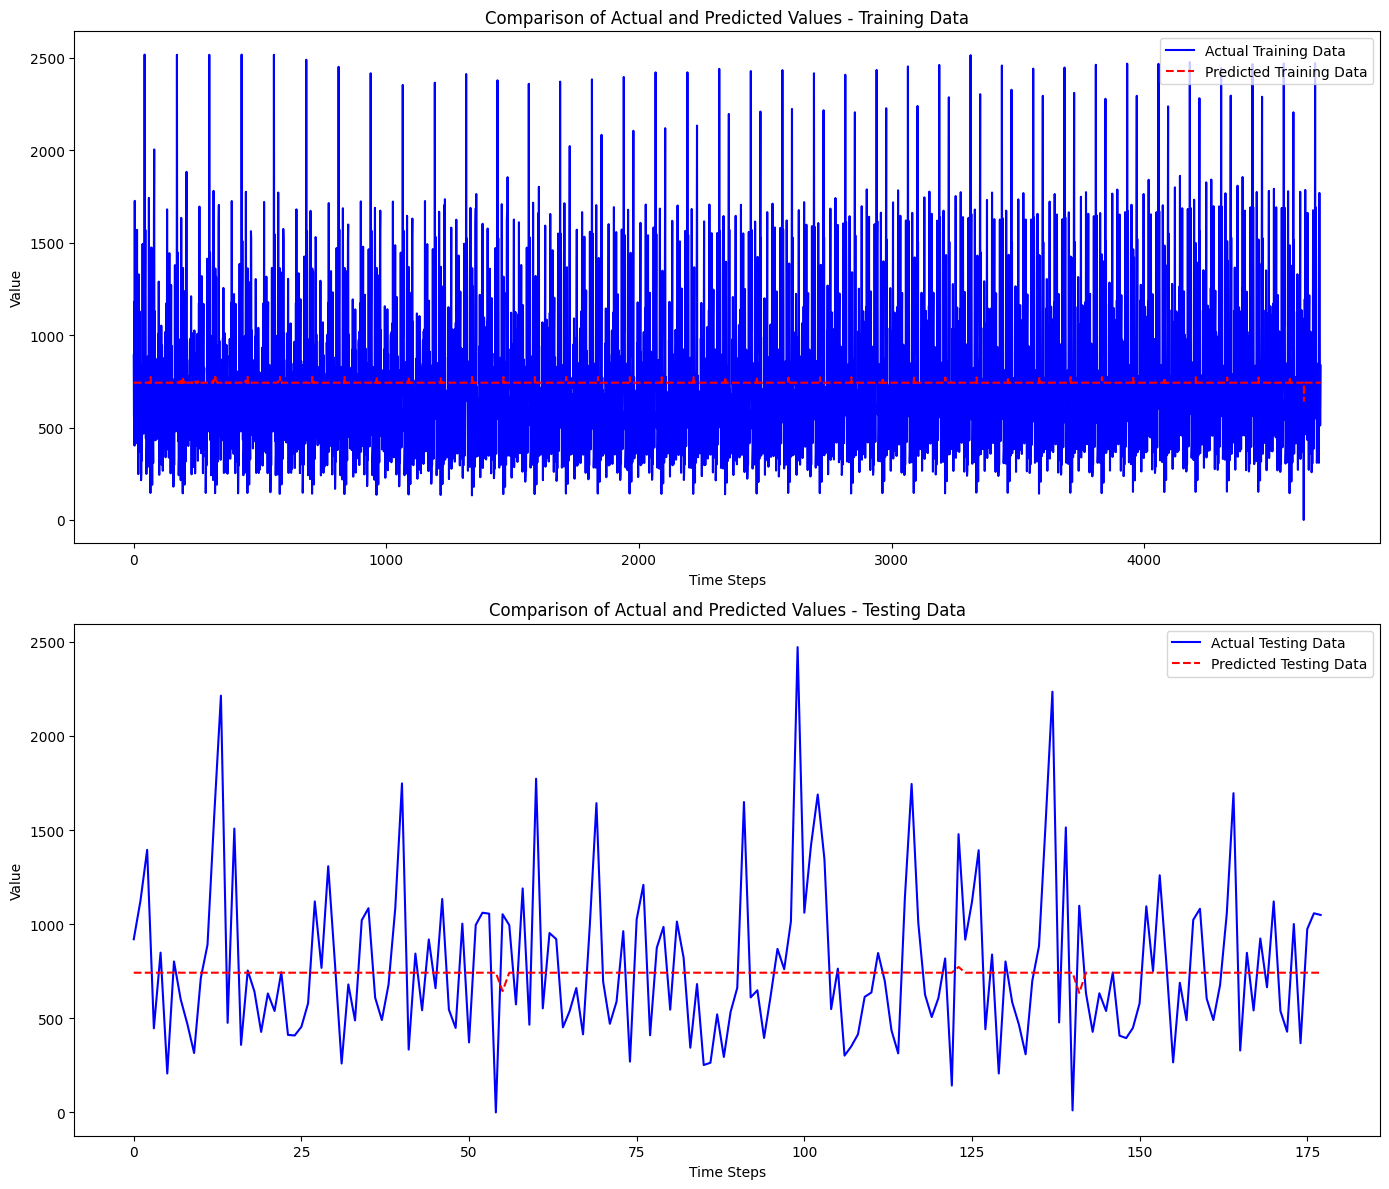

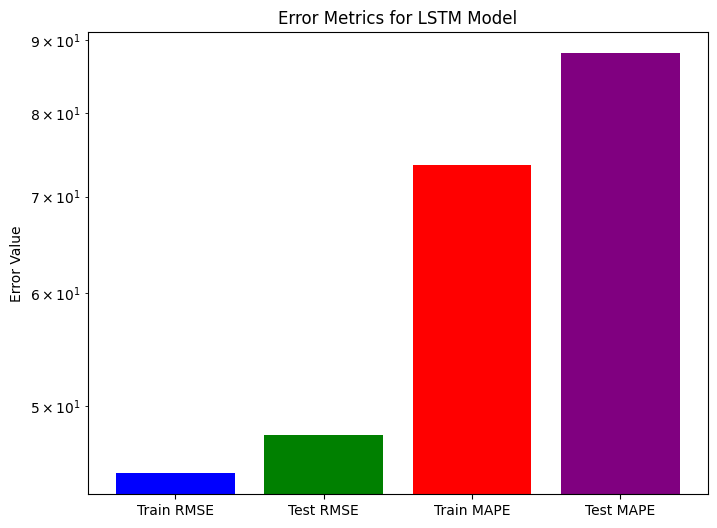

In [58]:
# Assuming we have already run the model and have the predictions and actual values

# Plotting actual vs predicted values for training and testing datasets
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Training Data Plot
ax[0].plot(trainY[:, 0], label='Actual Training Data', color='blue')
ax[0].plot(trainPredict[:, 0], label='Predicted Training Data', color='red', linestyle='--')
ax[0].set_title('Comparison of Actual and Predicted Values - Training Data')
ax[0].set_xlabel('Time Steps')
ax[0].set_ylabel('Value')
ax[0].legend()

# Testing Data Plot
ax[1].plot(testY[:, 0], label='Actual Testing Data', color='blue')
ax[1].plot(testPredict[:, 0], label='Predicted Testing Data', color='red', linestyle='--')
ax[1].set_title('Comparison of Actual and Predicted Values - Testing Data')
ax[1].set_xlabel('Time Steps')
ax[1].set_ylabel('Value')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting Error Metrics
error_metrics = {'Train RMSE': trainScore, 'Test RMSE': testScore, 'Train MAPE': trainMAPE, 'Test MAPE': testMAPE}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(error_metrics.keys(), error_metrics.values(), color=['blue', 'green', 'red', 'purple'])
ax.set_title('Error Metrics for LSTM Model')
ax.set_ylabel('Error Value')
ax.set_yscale('log')  # Using logarithmic scale to better visualize differences if errors vary widely
plt.show()
